In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import RandomForest
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Data/Kaggle/StoreSales/darts.csv", parse_dates=["date"])

In [3]:
df.head()

,date,store_nbr,family,sales
0,2013-01-01,1,3,0.0
1,2013-01-02,1,3,1091.0
2,2013-01-03,1,3,919.0
3,2013-01-04,1,3,953.0
4,2013-01-05,1,3,1160.0


In [4]:
ts = TimeSeries.from_dataframe(df, value_cols=["sales"])

In [5]:
split_ratio = 0.8
training_size = int(len(ts) * split_ratio)

In [6]:
train = ts[:training_size]
val = ts[training_size:]

In [7]:
model = RandomForest(lags=1, output_chunk_length=7)
model.fit(train)

RandomForest(lags=1, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=7, add_encoders=None, n_estimators=100, max_depth=None, multi_models=True, use_static_covariates=True)

In [8]:
predictions = model.predict(n=len(val))

In [9]:
val = val.pd_series().tolist()
predictions = predictions.pd_series().tolist()

In [10]:
predictions = np.maximum(predictions, 0)

In [11]:
rmse = np.sqrt(mean_squared_error(val, predictions))
rmsle = np.sqrt(mean_squared_error(np.log1p(val), np.log1p(predictions)))

In [12]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Error (RMSE): 768.4775402558267
Root Mean Squared Logarithmic Error (RMSLE): 0.6038746114762992


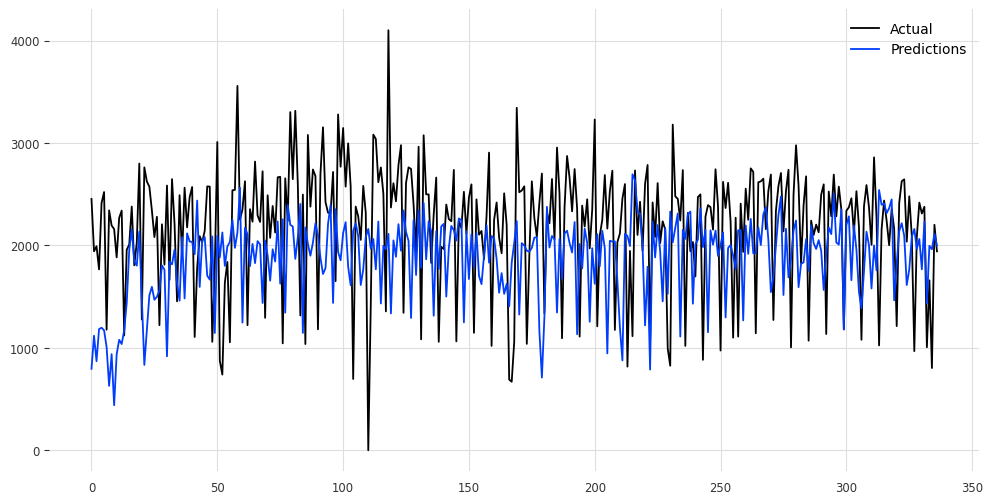

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(val, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()